In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import Data

In [2]:
ds = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [ ]:
ds.head()

In [ ]:
ds.shape

In [ ]:
ds.columns

In [ ]:
ds.info()

In [3]:
#Drop Columns
ds.drop (['Status', 'unnamed1'], axis =1, inplace = True)

In [ ]:
ds.info()

In [4]:
# Drop null value
ds.dropna(inplace =True)

In [ ]:
# Check for Null Values
pd.isnull(ds).sum()

In [ ]:
ds.dtypes

In [5]:
# Change Data Type
ds['Amount'] = ds['Amount'].astype('int')

In [ ]:
ds.columns

In [6]:
# Rename the Column
ds.rename(columns = {'Product_Category':'Product_Cat'}, inplace = True)

# EXPLORATORY DATA ANALYSIS

### GENDER

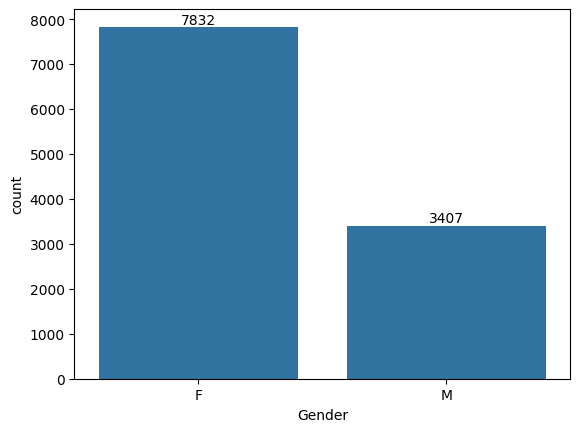

In [7]:
gen = sns.countplot(x='Gender', data = ds)
for bars in gen.containers:
 gen.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

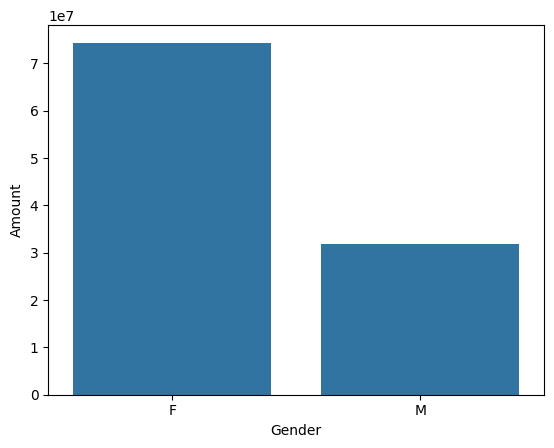

In [15]:
gen_order = ds.groupby(['Gender'], as_index = False)['Amount'].sum().sort_values(by=['Amount'], ascending = False)
sns.barplot(x='Gender',y = 'Amount', data = gen_order)

In [ ]:
plt.figure(figsize=(4, 4))  # Adjust the size as needed
plt.pie(
    gen_order['Amount'], 
    labels=gen_order['Gender'], 
    autopct='%1.1f%%', 
    startangle=100    
)
plt.title('Sales Distribution by Gender')
plt.show()

## Age

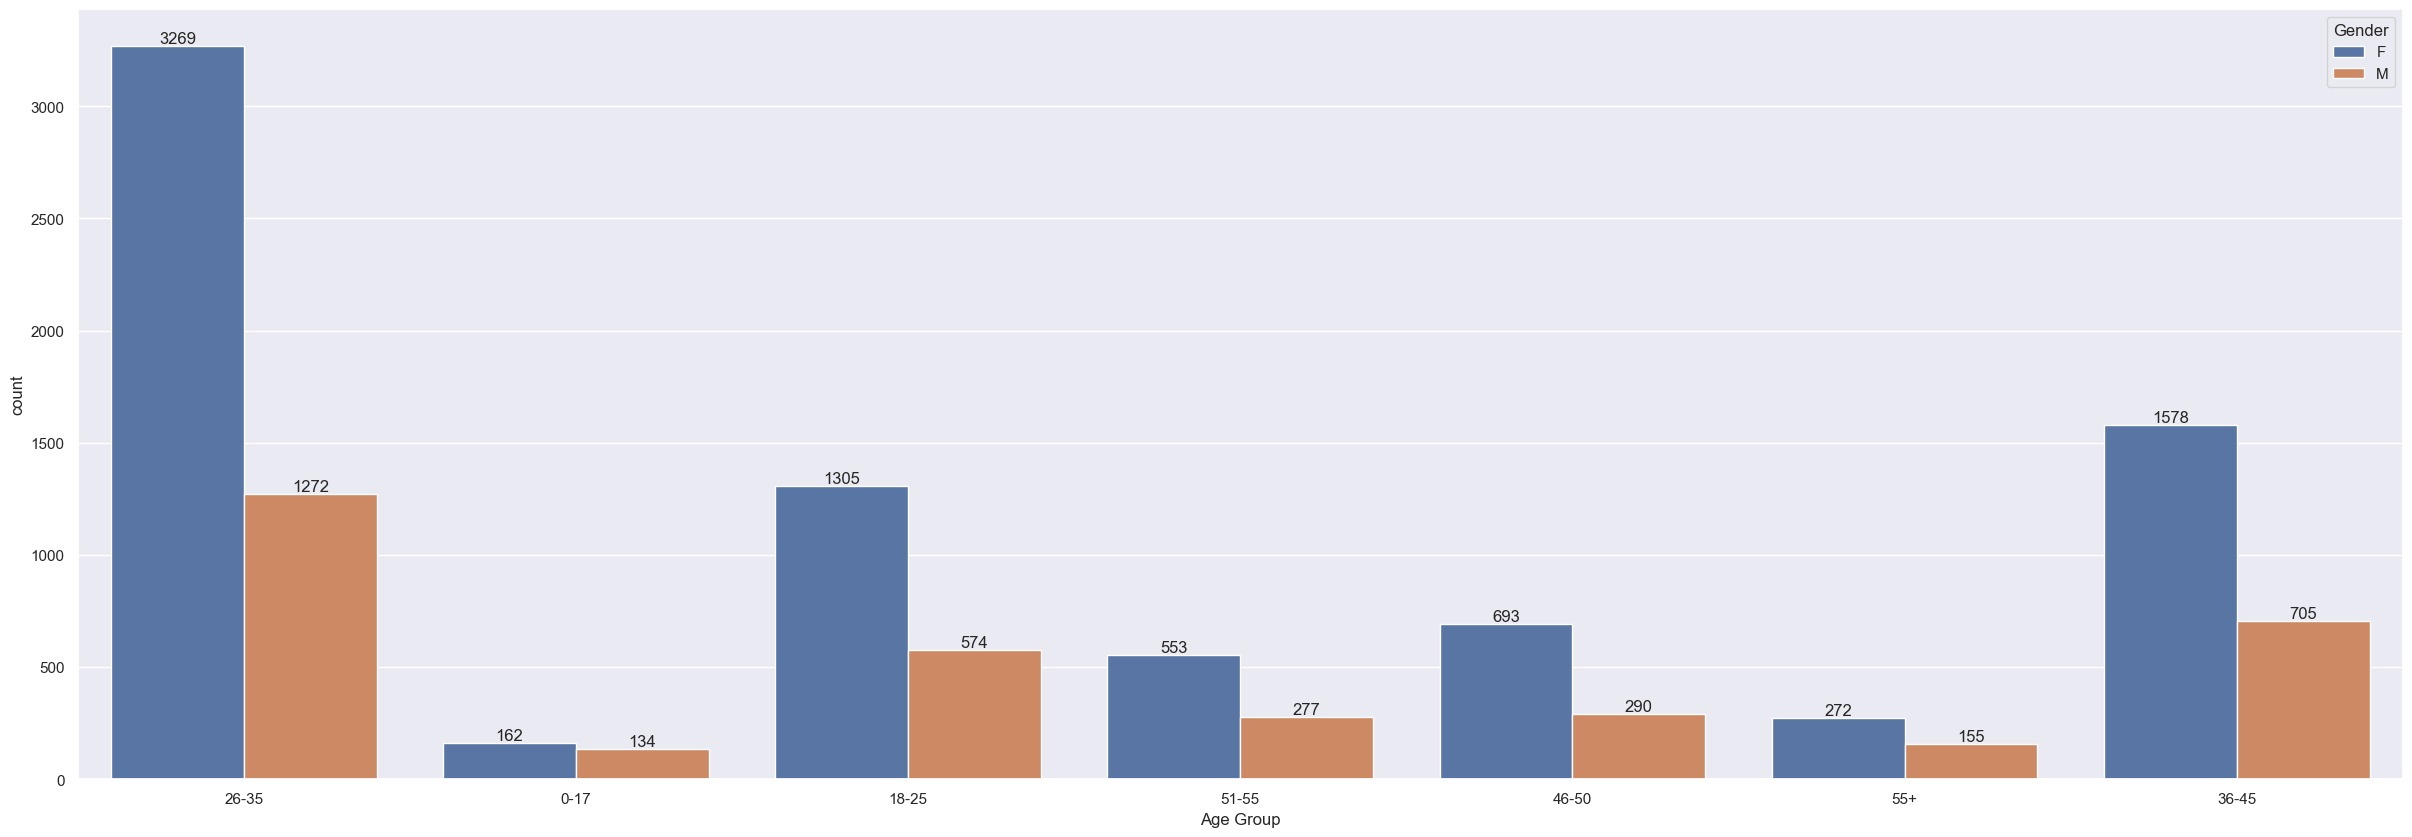

In [58]:
age_count = sns.countplot(x = 'Age Group', data = ds, hue ='Gender',)
for bars in age_count.containers:
    age_count.bar_label(bars)

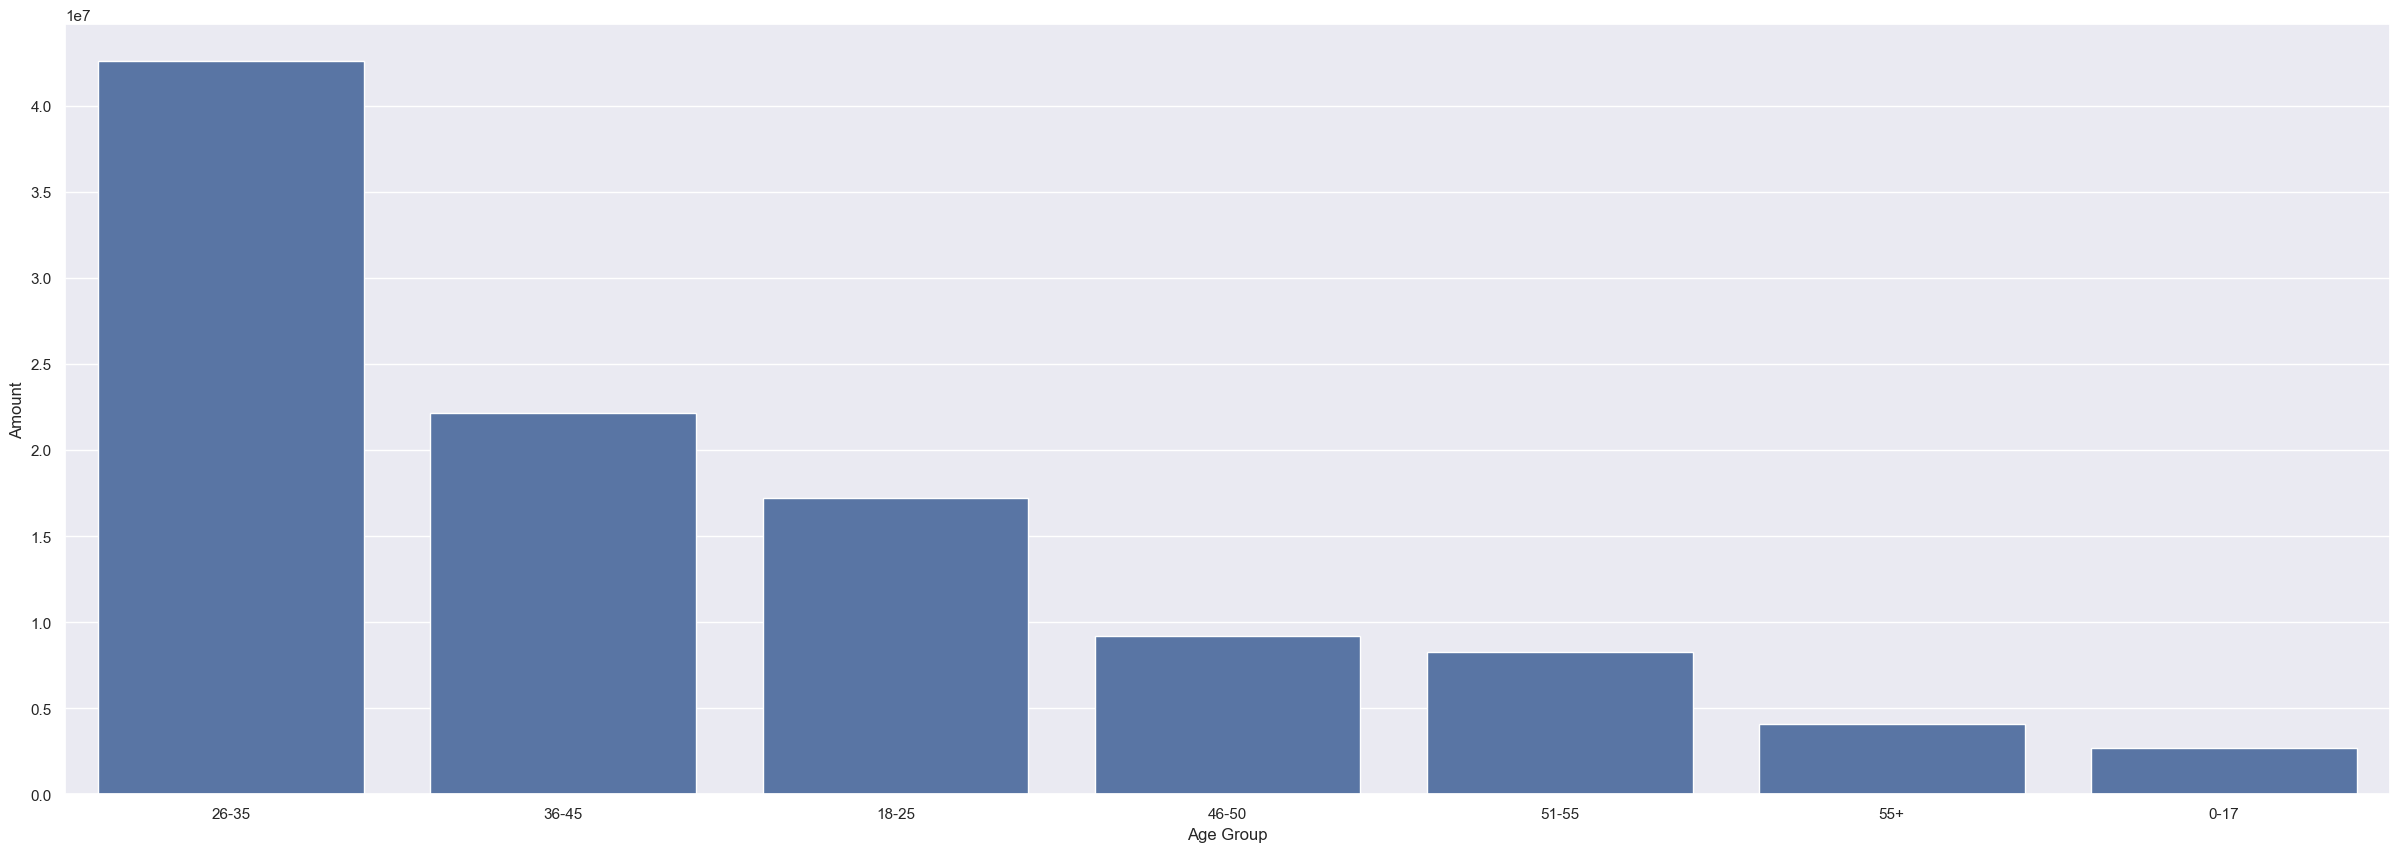

In [59]:
age_sales = ds.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = ['Amount'], ascending = False)
x = sns.barplot(x ='Age Group', y ='Amount',data = age_sales)

<Axes: xlabel='State', ylabel='Orders'>

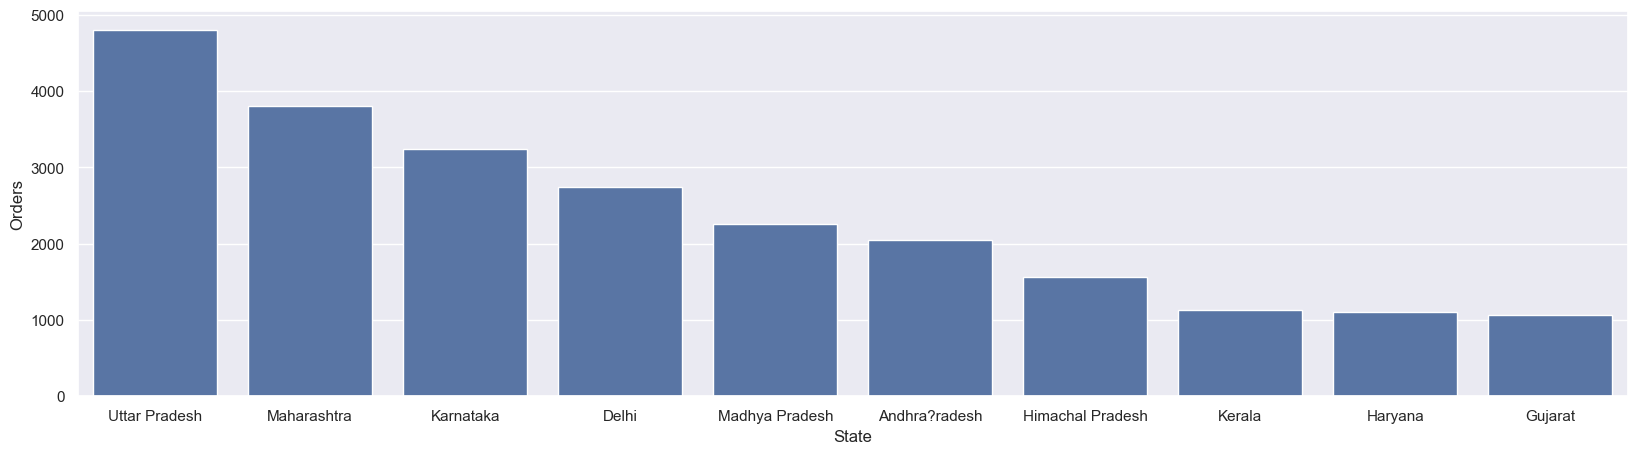

In [60]:
state_orders = ds.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by = ['Orders'], ascending = False).head(10)
sns.set({'figure.figsize':(20,5)})
sns.barplot(x = 'State', y = 'Orders', data = state_orders)

<Axes: xlabel='State', ylabel='Amount'>

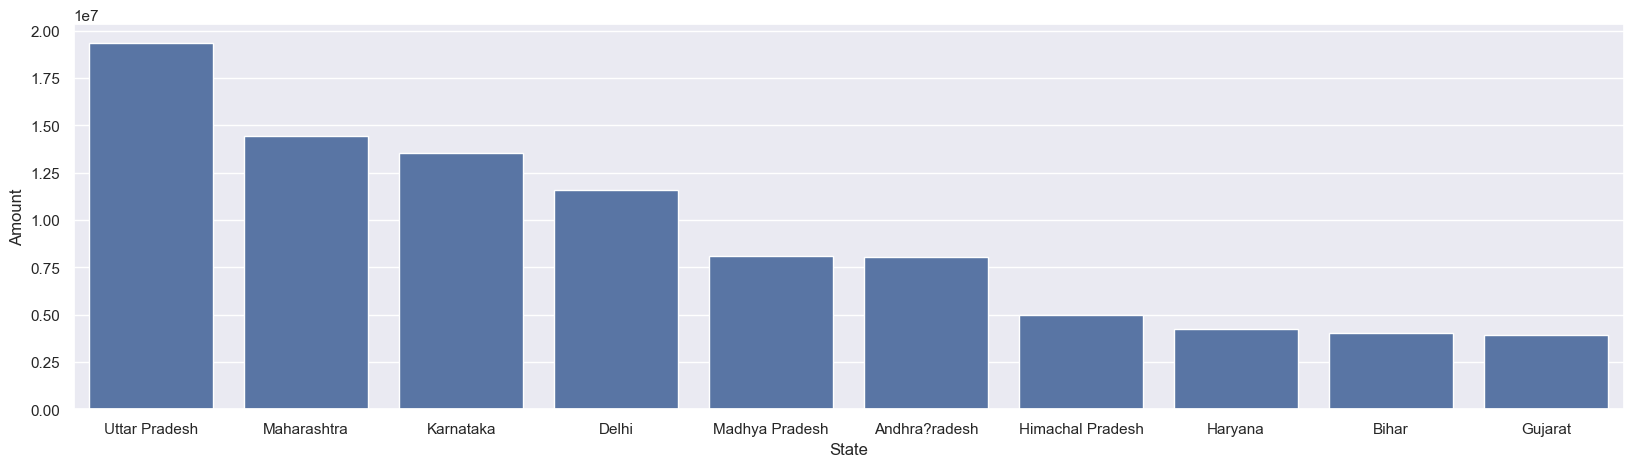

In [61]:
state_sales = ds.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = ['Amount'], ascending = False).head(10)
sns.set({'figure.figsize':(20,5)})
sns.barplot(x = 'State', y = 'Amount', data = state_sales )

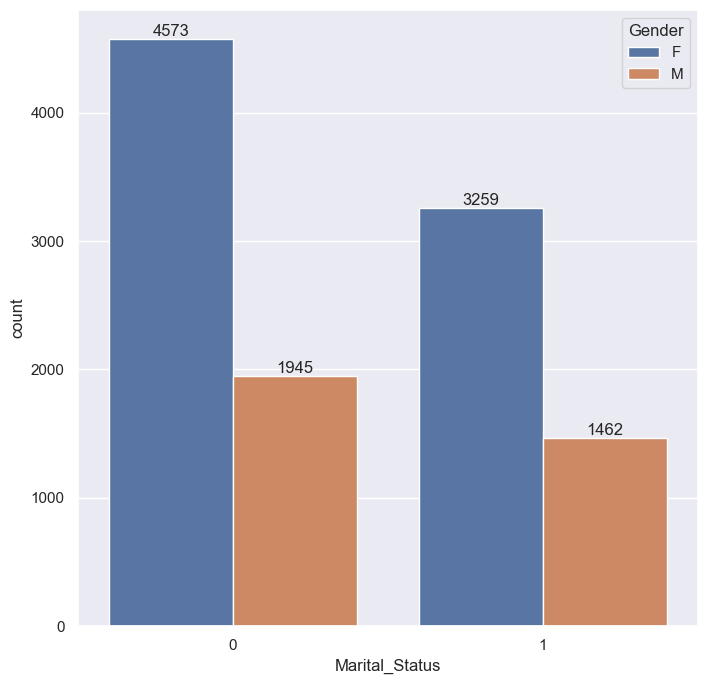

In [71]:
m_status = sns.countplot(data = ds, x = 'Marital_Status', hue ='Gender')
for bars in m_status.containers:
    m_status.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

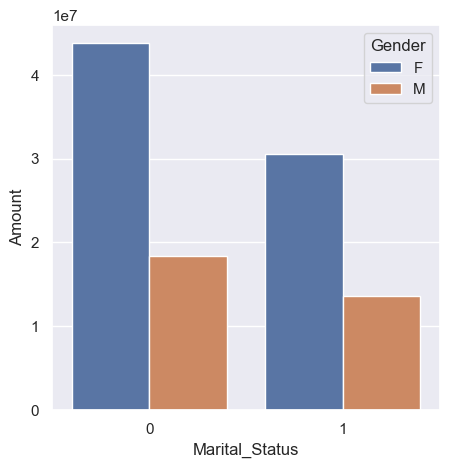

In [72]:
m_g_sales = ds.groupby(['Marital_Status','Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc={'figure.figsize':(5,5)})
sns.barplot(x = 'Marital_Status', y = 'Amount', data = m_g_sales, hue = 'Gender')

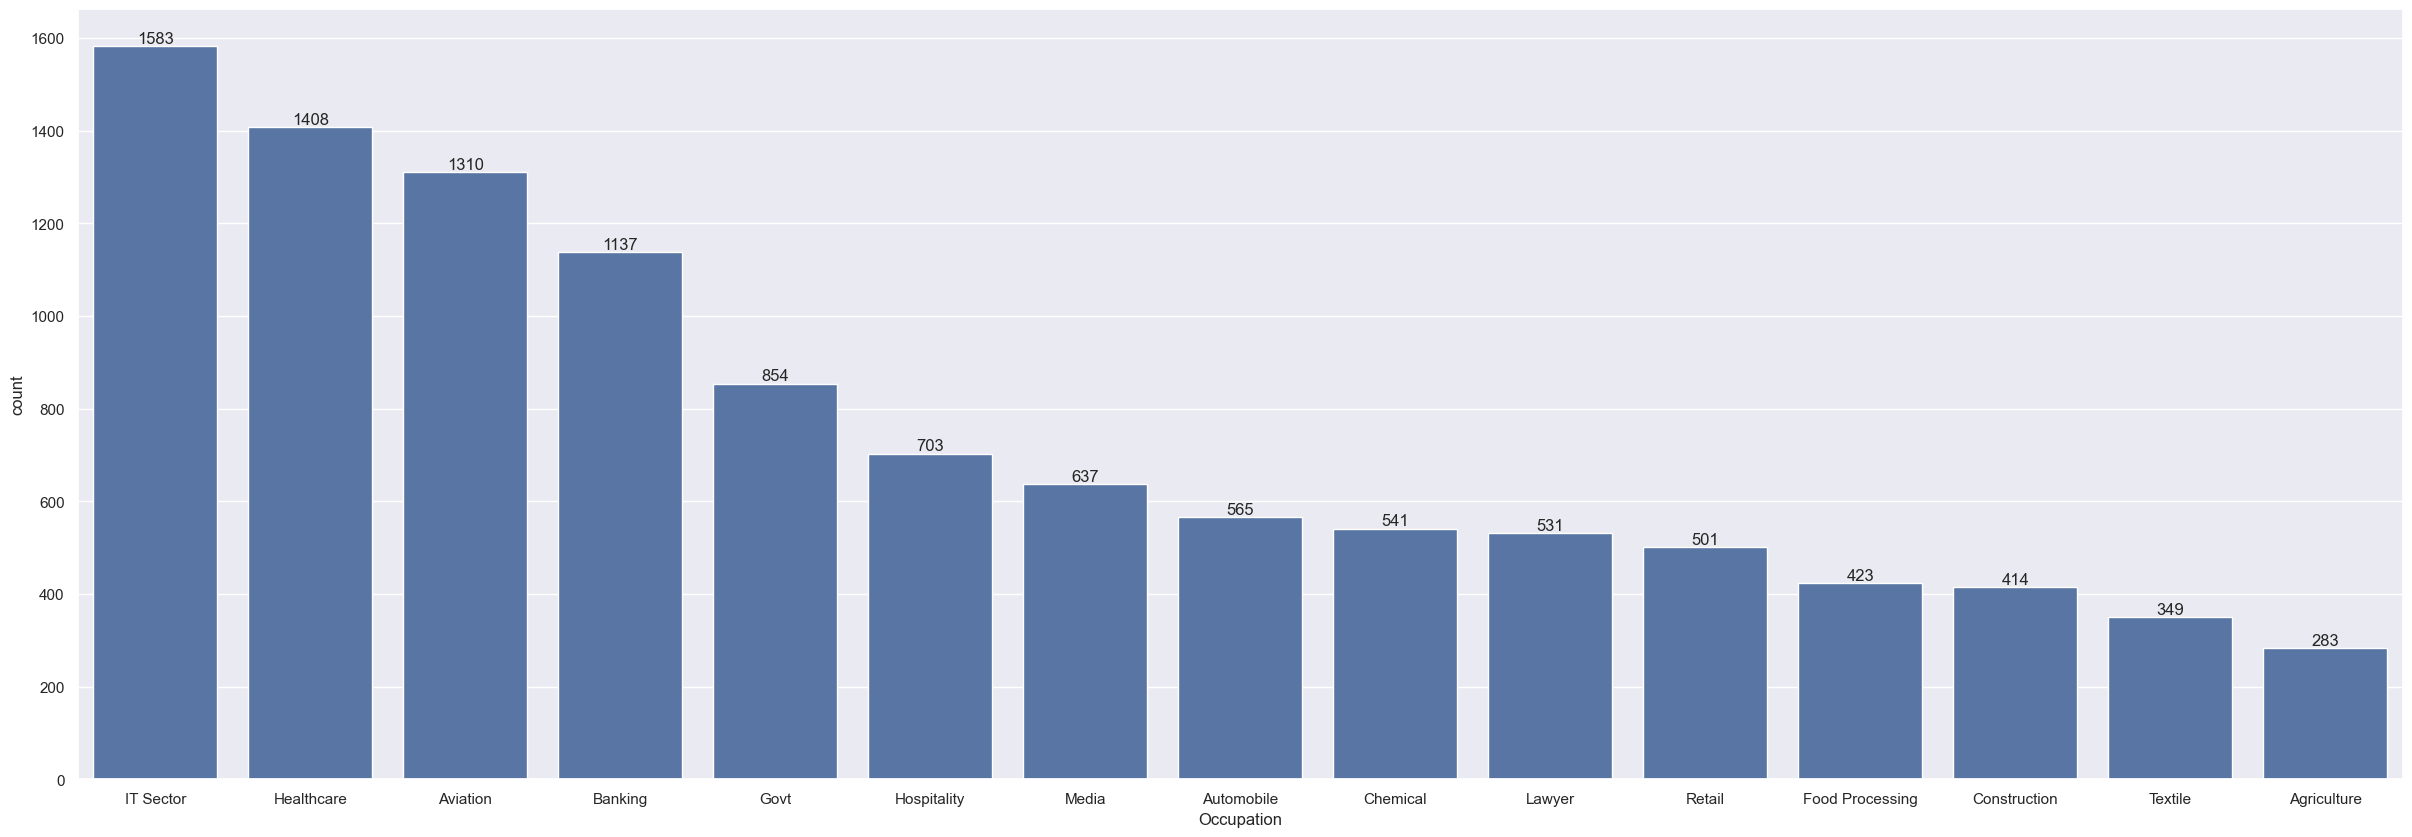

In [75]:
occ = sns.countplot(x = 'Occupation', data = ds, order = ds['Occupation'].value_counts().index)
sns.set(rc={'figure.figsize':(30,10)})
for bars in occ.containers:
    occ.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

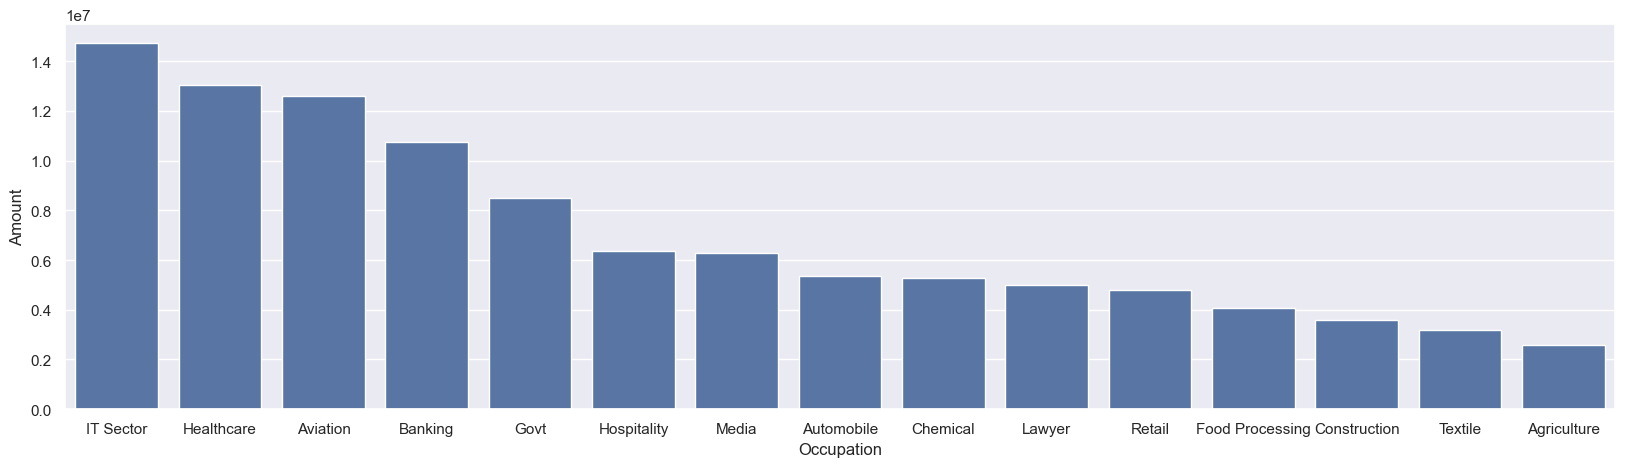

In [38]:
occ_sales = ds.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = occ_sales, x = 'Occupation',y= 'Amount')

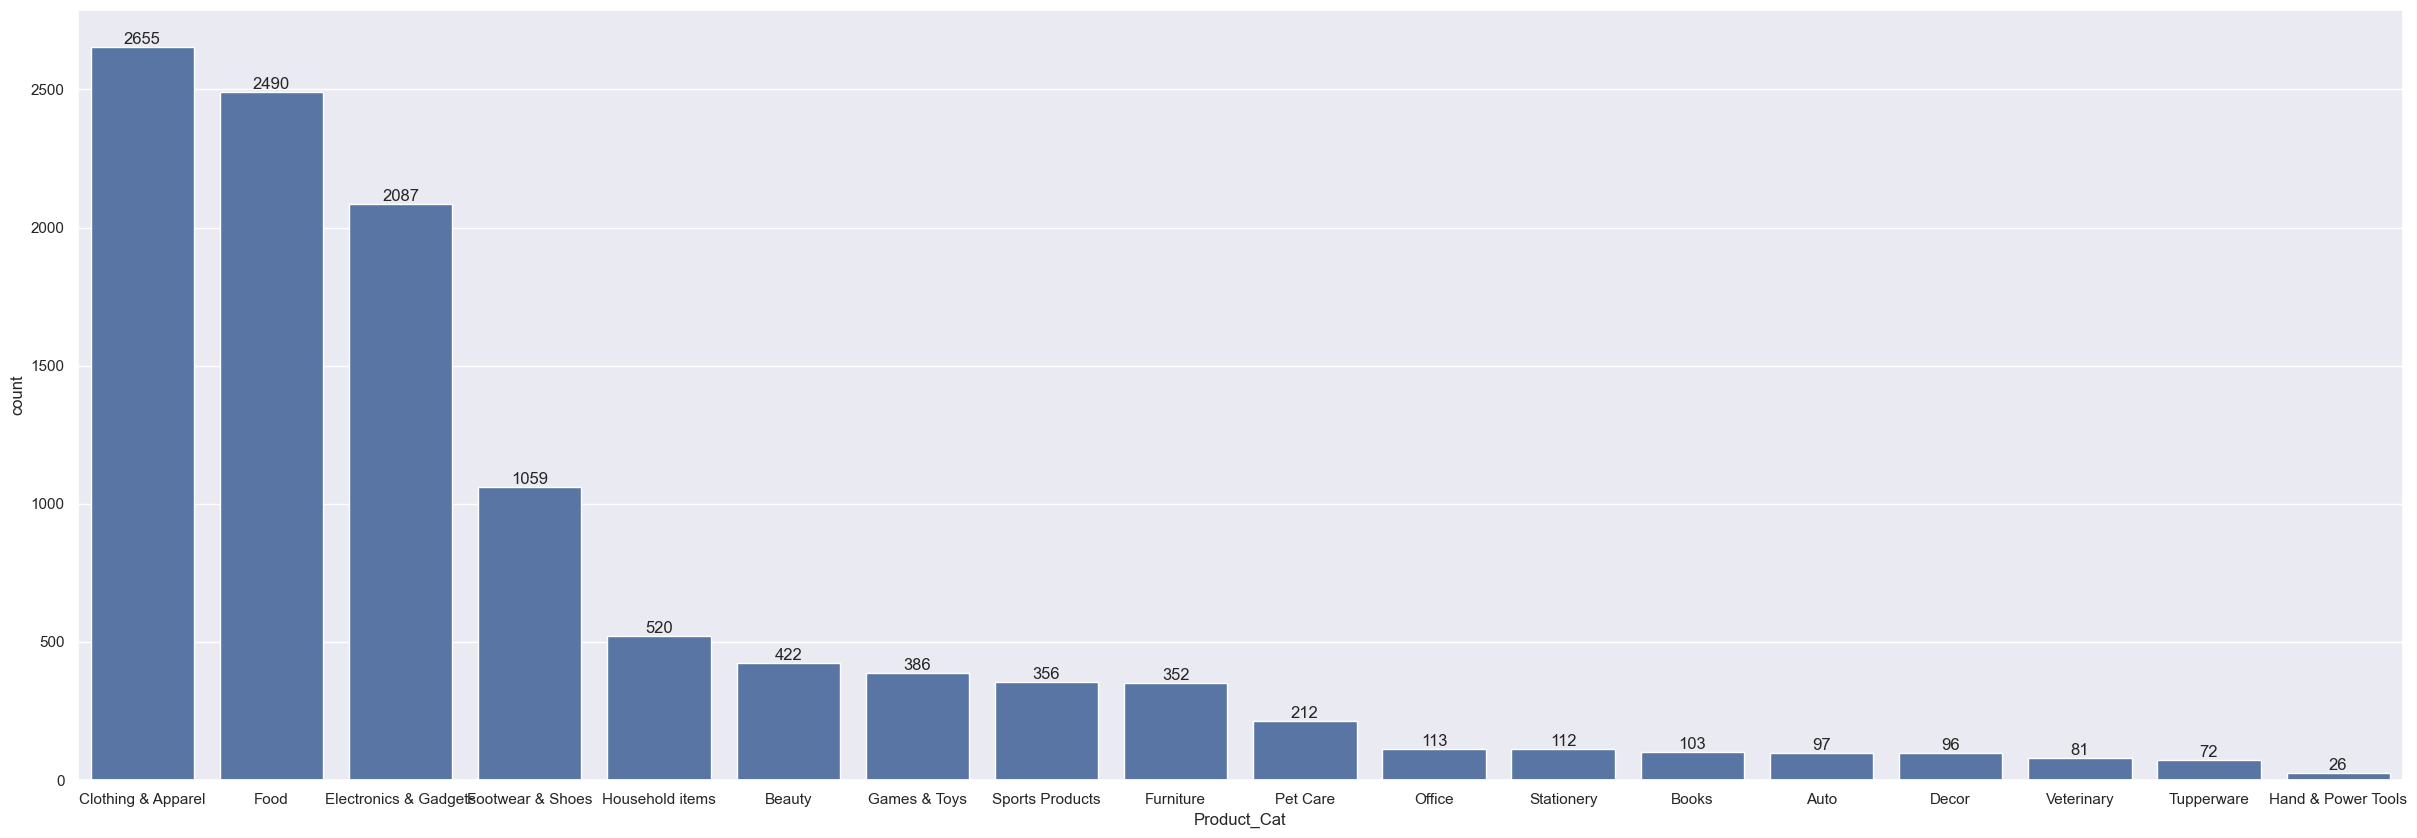

In [50]:
occ = sns.countplot(x = 'Product_Cat', data = ds, order = ds['Product_Cat'].value_counts().index)
sns.set(rc={'figure.figsize':(30,10)})
for bars in occ.containers:
    occ.bar_label(bars)

### Conclusion 

Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category

Thank you!